### Points to Address (Accessing)
1. Data data has error in some places, day and month has to be rearranged
   data1 and data6 has corrupt or erreneous data in datetime table.
   
2. Database is not exactly sorted w.r.t. to date
   Data1, Data6 and data6 has unsorted rows in some places
   
3. Fuel Voltage data has increasing trends in 5 out of 6 datafiles. But in actual, the trend must be decreasing wth time

4. Erreneous cumulative distance trends in file1, file4 and file6
5. There are outliers in all of the datsets. That has to be removed
6. Datetime data type is set as object.
7. Voltage data is in Hex form. Need to be corrected.
8. 'io_state' date is not uniform, it ranges from 1 bit to 8 bit. Additional zero padding is required.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, naive_bayes
import statsmodels 
import datetime
%matplotlib inline

#### Data Gathering

In [5]:
df1 = pd.read_csv(r"data\New\cordinates_007042639339.csv", names= ['id',"lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'b2'])
df2 = pd.read_csv(r"data\New\cordinates_007042641148.csv", names= ['id',"lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'b2'])
df3 = pd.read_csv(r"data\New\cordinates_007042644259.csv", names= ['id',"lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'b2'])

df4 = pd.read_csv(r"data\New\cordinates_007042647584.csv", names= ["lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'id'])
df5 = pd.read_csv(r"data\New\cordinates_007042648443.csv", names= ["lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'id'])
df6 = pd.read_csv(r"data\New\cordinates_008527923415.csv", names= ["lat","long","created_at","updated_at","device_id","speed","orientation","distance","received_at","io_state","availability","blnk",'id'])

#df4 = pd.read_csv(r"data\Analog\cordinates_007042639339.csv")
# df5 = pd.read_csv(r"data\008826369174.csv")
# df6 = pd.read_csv(r"data\009821702910.csv")

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
(df1.head())

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,blnk,b2
0,1.586620e+09,28.710535,77.179497,2017-11-22 04:37:33,NaN,7042639339,0.0,0.0,0,2017-11-22 04:37:25,00000007,A,NaN,NaN
1,1.586620e+09,28.710535,77.179497,2017-11-22 04:38:00,NaN,7042639339,0.0,0.0,0,2017-11-22 04:37:55,00000007,A,NaN,NaN
2,1.586620e+09,28.710535,77.179497,2017-11-22 04:38:32,NaN,7042639339,0.0,0.0,0,2017-11-22 04:38:25,00000007,A,NaN,NaN
3,1.586620e+09,28.710835,77.179620,2017-11-22 04:38:45,NaN,7042639339,0.0,0.0,3,2017-11-22 04:38:33,10000007,A,NaN,NaN
4,1.586620e+09,28.710835,77.179620,2017-11-22 04:38:51,NaN,7042639339,0.0,0.0,3,2017-11-22 04:38:45,10000007,A,NaN,NaN


In [7]:
df4.head()

,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,blnk,id
1.586620e+09,28.710792,77.179215,2017-11-21 14:04:39,NaN,7042647584,000.0,0.0,0,2017-11-21 14:04:34,00000007,A,NaN,NaN
1.586620e+09,28.710642,77.179408,2017-11-21 14:05:07,NaN,7042647584,000.0,0.0,0,2017-11-21 14:05:04,00000007,A,NaN,NaN
1.586620e+09,28.710563,77.179450,2017-11-21 14:05:38,NaN,7042647584,000.0,0.0,0,2017-11-21 14:05:34,00000007,A,NaN,NaN
1.586620e+09,28.710563,77.179450,2017-11-21 14:06:10,NaN,7042647584,000.0,0.0,0,2017-11-21 14:06:04,00000007,A,NaN,NaN
1.586620e+09,28.710563,77.179450,2017-11-21 14:06:45,NaN,7042647584,000.0,0.0,0,2017-11-21 14:06:34,00000007,A,NaN,NaN


### Data Wrangling - Part 1
#### Extracting relevant hex data to convert to int.

In [8]:
## Zero padding 'IO_state' data

df1['io_state']= df1.io_state.apply(lambda x: x.zfill(8))
df2['io_state']= df2.io_state.apply(lambda x: x.zfill(8))
df3['io_state']= df3.io_state.apply(lambda x: x.zfill(8))
df4['io_state']= df4.io_state.apply(lambda x: x.zfill(8))
df5['io_state']= df5.io_state.apply(lambda x: x.zfill(8))
df6['io_state']= df6.io_state.apply(lambda x: x.zfill(8))

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 61297 entries, nan to nan
Data columns (total 13 columns):
lat             61297 non-null float64
long            61297 non-null float64
created_at      61297 non-null object
updated_at      0 non-null float64
device_id       61297 non-null int64
speed           61297 non-null float64
orientation     61297 non-null float64
distance        61297 non-null int64
received_at     61297 non-null object
io_state        61297 non-null object
availability    61297 non-null object
blnk            0 non-null float64
id              61297 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 6.5+ MB


In [9]:
df1.head()

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,blnk,b2
0,1.586620e+09,28.710535,77.179497,2017-11-22 04:37:33,NaN,7042639339,0.0,0.0,0,2017-11-22 04:37:25,00000007,A,NaN,NaN
1,1.586620e+09,28.710535,77.179497,2017-11-22 04:38:00,NaN,7042639339,0.0,0.0,0,2017-11-22 04:37:55,00000007,A,NaN,NaN
2,1.586620e+09,28.710535,77.179497,2017-11-22 04:38:32,NaN,7042639339,0.0,0.0,0,2017-11-22 04:38:25,00000007,A,NaN,NaN
3,1.586620e+09,28.710835,77.179620,2017-11-22 04:38:45,NaN,7042639339,0.0,0.0,3,2017-11-22 04:38:33,10000007,A,NaN,NaN
4,1.586620e+09,28.710835,77.179620,2017-11-22 04:38:51,NaN,7042639339,0.0,0.0,3,2017-11-22 04:38:45,10000007,A,NaN,NaN


In [10]:
df1.io_state[2]

'00000007'

In [11]:
a = df1.io_state[2][-3:]
int(a,16)

7

In [12]:
df1['FuelVoltage']= df1.io_state.apply(lambda x: int(x[-3:],16))
df2['FuelVoltage']= df2.io_state.apply(lambda x: int(x[-3:],16))
df3['FuelVoltage']= df3.io_state.apply(lambda x: int(x[-3:],16))
df4['FuelVoltage']= df4.io_state.apply(lambda x: int(x[-3:],16))
df5['FuelVoltage']= df5.io_state.apply(lambda x: int(x[-3:],16))
df6['FuelVoltage']= df6.io_state.apply(lambda x: int(x[-3:],16))

In [18]:
df1.FuelVoltage.describe()

count    61297.000000
mean       166.282901
std        179.901784
min          3.000000
25%          3.000000
50%         10.000000
75%        366.000000
max       2073.000000
Name: FuelVoltage, dtype: float64

In [19]:
### Extracting Device State: ON/OFF from io_state data


In [13]:
df1['dev_state']= df1.io_state.apply(lambda x: x[1])
df2['dev_state']= df2.io_state.apply(lambda x: x[1])
df3['dev_state']= df3.io_state.apply(lambda x: x[1])
df4['dev_state']= df4.io_state.apply(lambda x: x[1])
df5['dev_state']= df5.io_state.apply(lambda x: x[1])
df6['dev_state']= df6.io_state.apply(lambda x: x[1])

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 61297 entries, nan to nan
Data columns (total 15 columns):
lat             61297 non-null float64
long            61297 non-null float64
created_at      61297 non-null object
updated_at      0 non-null float64
device_id       61297 non-null int64
speed           61297 non-null float64
orientation     61297 non-null float64
distance        61297 non-null int64
received_at     61297 non-null object
io_state        61297 non-null object
availability    61297 non-null object
blnk            0 non-null float64
id              61297 non-null int64
FuelVoltage     61297 non-null int64
dev_state       61297 non-null object
dtypes: float64(6), int64(4), object(5)
memory usage: 8.7+ MB


In [22]:
df1.head(500)

,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,blnk,id,FuelVoltage,dev_state
NaN,28.710207,77.178333,2018-02-15 09:10:29,NaN,9821737256,0.0,0.00,0,2018-02-15 09:10:24,10000003,A,NaN,2369055810,3,0
NaN,28.710207,77.178333,2018-02-15 09:10:59,NaN,9821737256,0.0,0.00,0,2018-02-15 09:10:54,10000003,A,NaN,2369055811,3,0
NaN,28.710207,77.178333,2018-02-15 09:11:27,NaN,9821737256,0.0,0.00,0,2018-02-15 09:11:24,10000003,A,NaN,2369055812,3,0
NaN,28.710207,77.178333,2018-02-15 09:11:58,NaN,9821737256,0.0,0.00,0,2018-02-15 09:11:54,10000003,A,NaN,2369055813,3,0
NaN,28.710207,77.178333,2018-02-15 09:12:29,NaN,9821737256,0.0,0.00,0,2018-02-15 09:12:24,10000003,A,NaN,2369055814,3,0
NaN,28.710207,77.178333,2018-02-15 09:12:58,NaN,9821737256,0.0,0.00,0,2018-02-15 09:12:55,10000003,A,NaN,2369055815,3,0
NaN,28.710207,77.178333,2018-02-15 09:13:31,NaN,9821737256,0.0,0.00,0,2018-02-15 09:13:25,10000003,A,NaN,2369055816,3,0
NaN,28.710207,77.178333,2018-02-15 09:14:00,NaN,9821737256,0.0,0.00,0,2018-02-15 09:13:55,10000003,A,NaN,2369055817,3,0
NaN,28.710207,77.178333,2018-02-15 09:14:27,NaN,9821737256,0.0,0.00,0,2018-02-15 09:14:25,10000003,V,NaN,2369055818,3,0
NaN,28.710207,77.178333,2018-02-15 09:14:58,NaN,9821737256,0.0,0.00,0,2018-02-15 09:14:55,10000003,A,NaN,2369055819,3,0


### Data Wrangling - Part 2
#### Extracting relevant columns and storing to dataframe and csv files

In [14]:
mydf1 = pd.DataFrame()
mydf2 = pd.DataFrame()
mydf3 = pd.DataFrame()
mydf4 = pd.DataFrame()
mydf5 = pd.DataFrame()
mydf6 = pd.DataFrame()

mydf1[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df1[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf2[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df2[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf3[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df3[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf4[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df4[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf5[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df5[['received_at','speed','distance','FuelVoltage', 'dev_state']]
mydf6[['datetime','speed','distance','fuelVoltage', 'dev_state']] = df6[['received_at','speed','distance','FuelVoltage', 'dev_state']]

In [15]:
mydf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270439 entries, 0 to 270438
Data columns (total 5 columns):
datetime       270439 non-null object
speed          270439 non-null float64
distance       270439 non-null int64
fuelVoltage    270439 non-null int64
dev_state      270439 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 10.3+ MB


In [27]:
#mydf2.datetime = pd.to_datetime(mydf2.datetime)
mydf1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 61297 entries, nan to nan
Data columns (total 5 columns):
datetime       61297 non-null object
speed          61297 non-null float64
distance       61297 non-null int64
fuelVoltage    61297 non-null int64
dev_state      61297 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [33]:
mydf1.to_csv("data\Analog\data1.csv")
mydf2.to_csv("data\Analog\data2.csv")
mydf3.to_csv("data\Analog\data3.csv")
mydf4.to_csv("data\Analog\data4.csv")
mydf5.to_csv("data\Analog\data5.csv")
mydf6.to_csv("data\Analog\data6.csv")

#### Example Assesement

(736668.0, 736694.0)

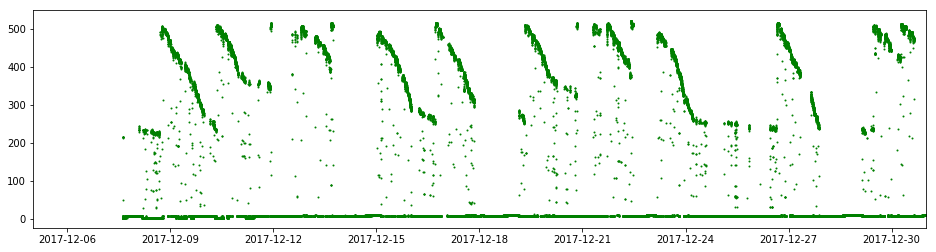

In [28]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(pd.to_datetime(mydf1.datetime),mydf1.fuelVoltage,'g.', markersize = 2);
#plt.ylim(200,400);
plt.xlim(datetime.datetime(2017,12,5),datetime.datetime(2017,12,31))

(736673.0, 736694.0)

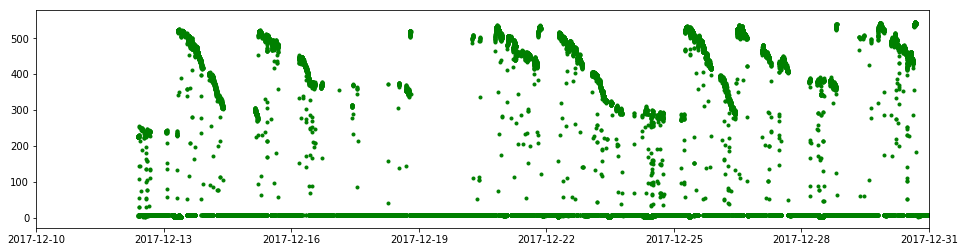

In [23]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(pd.to_datetime(mydf2.datetime),mydf2.fuelVoltage, 'g.');
#plt.ylim(200,400);
plt.xlim(datetime.datetime(2017,12,10),datetime.datetime(2017,12,31))

(736706.0, 736778.0)

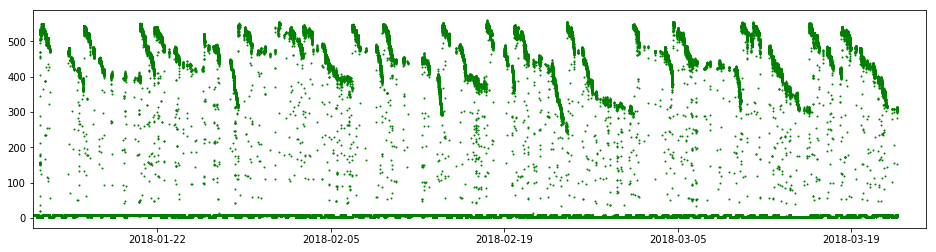

In [32]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(pd.to_datetime(mydf3.datetime),mydf3.fuelVoltage, 'g.', markersize = 2);
#plt.ylim(200,400);
plt.xlim(datetime.datetime(2018,1,12),datetime.datetime(2018,3,25))

In [50]:
a = df1.io_state[7]
a.zfill(8)

'01000007'

In [51]:
a= '10000040'

In [52]:
a.zfill(8)

'10000040'

In [53]:
a = ['10','22','111']

In [54]:
df1.device_id[0],df2.device_id[0],df3.device_id[0],df4.device_id[0],df5.device_id[0],df6.device_id[0]

(8527945276, 8527946327, 8527948065, 9821737256, 9821746470, 9821747419)

In [55]:
df1[df1['dev_state']=='.'][['io_state','dev_state']]

,io_state,dev_state


In [56]:
df1.io_state[3856]

'010001E3'